# 📈 Introduction to Interest Rate Markets

## Overview
This notebook provides an introduction to **interest rate markets**, focusing on key concepts and calculations essential for understanding how different interest rates are applied in financial contexts. We will cover various types of interest rates and explore the formulas for simple interest, compounded interest, and continuous interest.

## 💹 Types of Interest Rates
Interest rates are fundamental in finance and come in various forms. The main types include:

- **Simple Interest Rate**: Interest calculated only on the principal amount.
- **Compounded Interest Rate**: Interest calculated on both the principal and the accumulated interest.
- **Continuous Interest Rate**: Interest compounded continuously, leading to the exponential growth of the principal.

## 🧮 Simple Interest
Simple interest is calculated using the formula:

$$
I = P \cdot r \cdot t
$$

Where:
- $I$ is the interest earned.
- $P$ is the principal amount.
- $r$ is the annual interest rate.
- $t$ is the time period in years.

The amount after $t$ years, $A$, is:

$$
A = P \cdot (1 + r \cdot t)
$$

## 🔄 Compounded Interest
Compounded interest accounts for interest on interest. The formula is:

$$
A = P \cdot \left(1 + \frac{r}{n}\right)^{n \cdot t}
$$

Where:
- $A$ is the amount after $t$ years.
- $P$ is the principal amount.
- $r$ is the annual interest rate.
- $n$ is the number of compounding periods per year.
- $t$ is the time period in years.

The interest earned, $I$, is:

$$
I = A - P
$$

## ♾️ Continuous Compounding
When interest is compounded continuously, the formula becomes:

$$
A = P \cdot e^{r \cdot t}
$$

Where:
- $A$ is the amount after $t$ years.
- $P$ is the principal amount.
- $r$ is the annual interest rate.
- $t$ is the time period in years.
- $e$ is the base of the natural logarithm (approximately 2.71828).

The interest earned, $I$, in this case is:

$$
I = A - P
$$


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

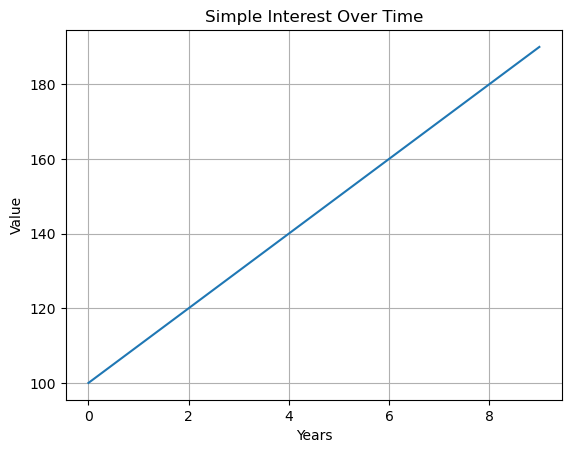

In [3]:
# Simple interest example 
rate = 0.1 # annual rate
c0 = 100 # initial capital
n = 10 # number of years 

value_history = []
for i in range(n):
    value = c0 * (1 + rate * i) # IMPORTANT : (rate, n) should have the same unit
    value_history.append(value)

# Plotting the values
plt.plot(range(n), value_history)
plt.xlabel('Years')
plt.ylabel('Value')
plt.title('Simple Interest Over Time')
plt.grid(True)
plt.show()

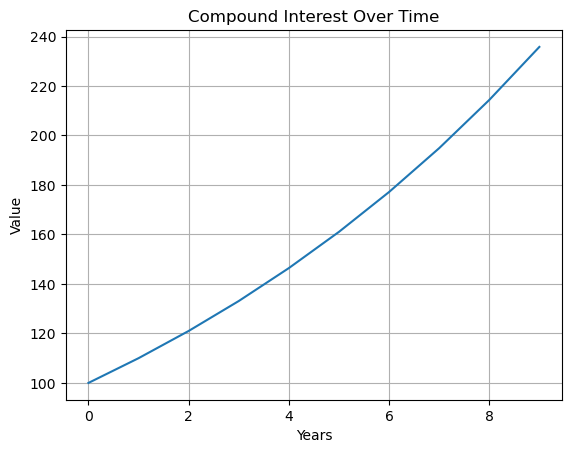

In [4]:
# Compound interest example 
rate = 0.1 # annual rate
c0 = 100 # initial capital
n = 10 # number of years 

value_history = []
for i in range(n):
    value = c0 * (1 + rate) ** i
    value_history.append(value)

# Plotting the values
plt.plot(range(n), value_history)
plt.xlabel('Years')
plt.ylabel('Value')
plt.title('Compound Interest Over Time')
plt.grid(True)
plt.show()

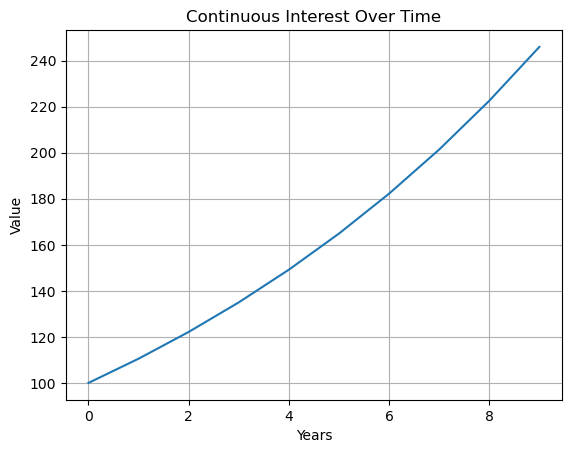

In [5]:
# Continuous interest example 
rate = 0.1 # annual rate
c0 = 100 # initial capital
n = 10 # number of years 

value_history = []
for i in range(n):
    value = c0 * np.exp(rate * i)
    value_history.append(value)

# Plotting the values
plt.plot(range(n), value_history)
plt.xlabel('Years')
plt.ylabel('Value')
plt.title('Continuous Interest Over Time')
plt.grid(True)
plt.show()

## Zero Coupon Rate
This rate corresponds to the rate paid for a zero coupon bond in x years. 
It can be computed using the market value of the others bonds

In [6]:
# Half of the annual coupon is paid every semester
data_for_boostrap = pd.DataFrame({
    'Face Value': [100, 100, 100, 100, 100],
    'Maturity': [0.25, 0.5, 1, 1.5, 2],
    'Annual Coupon': [0, 0, 0, 4, 5],
    'Bond Price': [99.6, 99, 97.8, 102.5, 105],
    'Actuarial rate': [1.6064, 2.0202, 2.2495, 2.2949, 2.4238]
})

print(data_for_boostrap.head())

# Computing the zero coupon rates for bonds that already don't pay any coupon
zc_rate_3m = np.log(data_for_boostrap['Face Value'].iloc[0] / data_for_boostrap['Bond Price'].iloc[0]) / data_for_boostrap['Maturity'].iloc[0]
zc_rate_6m = np.log(data_for_boostrap['Face Value'].iloc[1] / data_for_boostrap['Bond Price'].iloc[1]) / data_for_boostrap['Maturity'].iloc[1]
zc_rate_1y = np.log(data_for_boostrap['Face Value'].iloc[2] / data_for_boostrap['Bond Price'].iloc[2]) / data_for_boostrap['Maturity'].iloc[2]

print(f'ZC rate for 3Months : {zc_rate_3m}, ZC rate for 6Months : {zc_rate_6m}, ZC rate for 1Year : {zc_rate_1y}')

# Computing the zero coupon rates for bonds that pay coupons
pv_coupon_bond4 = (data_for_boostrap['Annual Coupon'].iloc[3] / 2) * np.exp(-zc_rate_6m * 0.5) + (data_for_boostrap['Annual Coupon'].iloc[3] / 2) * np.exp(-zc_rate_1y * 1)
inter = (data_for_boostrap['Bond Price'].iloc[3] - pv_coupon_bond4) / (data_for_boostrap['Face Value'].iloc[3] + data_for_boostrap['Annual Coupon'].iloc[3] / 2)
zc_rate_18m = -np.log(inter) / data_for_boostrap['Maturity'].iloc[3]

print(f'ZC rate for 1.5Year {zc_rate_18m}') 

   Face Value  Maturity  Annual Coupon  Bond Price  Actuarial rate
0         100      0.25              0        99.6          1.6064
1         100      0.50              0        99.0          2.0202
2         100      1.00              0        97.8          2.2495
3         100      1.50              4       102.5          2.2949
4         100      2.00              5       105.0          2.4238
ZC rate for 3Months : 0.01603208559015547, ZC rate for 6Months : 0.020100671707003012, ZC rate for 1Year : 0.022245608947319737
ZC rate for 1.5Year 0.022844486604668136


## Forward Rate 
This rate is the 1y zero coupon rate of the future years.  
It can be computed using zero coupon rate.

In [7]:
data_zc = pd.DataFrame({
    'year n': [1, 2, 3, 4, 5],
    'Zero Coupon Rate': [0.03, 0.04, 0.046, 0.05, 0.053],
})

forward_rate_1to2 = 2 * data_zc['Zero Coupon Rate'].iloc[1] - data_zc['Zero Coupon Rate'].iloc[0]
forward_rate_2to3 = 3 * data_zc['Zero Coupon Rate'].iloc[2] - 2 * data_zc['Zero Coupon Rate'].iloc[1]
forward_rate_3to4 = 4 * data_zc['Zero Coupon Rate'].iloc[3] - 3 * data_zc['Zero Coupon Rate'].iloc[2]
forward_rate_4to5 = 5 * data_zc['Zero Coupon Rate'].iloc[4] - 4 * data_zc['Zero Coupon Rate'].iloc[3]
print(f'taux forward entre année 1 et 2 : {forward_rate_1to2} / taux forward entre année 2 et 3 : {forward_rate_2to3} / taux forward entre année 3 et 4 : {forward_rate_3to4}')

taux forward entre année 1 et 2 : 0.05 / taux forward entre année 2 et 3 : 0.05800000000000001 / taux forward entre année 3 et 4 : 0.062


# Forward Rate Agreement (FRA)

A **Forward Rate Agreement (FRA)** is an over-the-counter financial contract between two parties to exchange interest payments on a specified notional amount, based on a future interest rate. FRAs are typically used to hedge or speculate on future interest rate movements.

## Key Components
- **Notional Amount**: The principal on which interest payments are calculated.
- **Contract Period**: The duration for which the interest rate is locked in (e.g., 1 month, 3 months, etc.).
- **Fixed Rate**: The agreed-upon interest rate set in the FRA contract.
- **Floating Rate**: The actual market interest rate at the time the contract settles (usually based on a reference rate like LIBOR or EURIBOR).

## Working of an FRA
1. **Agreement**: Two parties agree to exchange interest rate payments, one at a fixed rate, the other at a floating rate, for a specific period in the future.
2. **Settlement**: At the start of the contract period, the floating rate is observed, and the difference between the fixed rate and the floating rate is calculated. The party that is "in the money" is paid by the other party based on this difference.
3. **Payout**: The payout is the difference between the fixed and floating rates, applied to the notional amount, and discounted to the start of the contract period.


In [8]:
# Example of FRA
capital = 1000000
fixed_rate = 0.04
start_in = 3 # investment start in 3 years
investment_period = 3/12 # the investment will last 3 months
libor_rate_at_start_date = 0.045

fra_flow = capital * (fixed_rate - libor_rate_at_start_date) * investment_period # Forward Rate Agreement flow in 3 years AND 3 months
fra_flow_actualised = fra_flow / (1 + libor_rate_at_start_date * investment_period) # actualised at the invetsment start date

print(f'FRA flow actualised : {fra_flow_actualised}')

FRA flow actualised : -1236.093943139678


# Bond Duration and Convexity

When using continuous discounting, as per John Hull's *Options, Futures, and Other Derivatives*, **duration** and **convexity** together provide a more accurate measure of a bond’s price sensitivity to changes in yield. While duration approximates the linear relationship, convexity adjusts for the curvature in the bond price-yield relationship.

## Key Concepts
- **Macaulay Duration**: The weighted average time until the bond's cash flows are received, calculated using continuous compounding.
- **Convexity**: A measure of the curvature or the second derivative of the price-yield curve, indicating how the bond's duration changes with interest rates.

## Macaulay Duration Formula (Continuous Discounting)
With continuous discounting, the Macaulay duration is given by:

$$ D_M = \frac{ \sum \left( t \times CF_t \times e^{-r t} \right) }{ P } $$

Where:
- $ t $ = time period (in years)
- $ CF_t $ = cash flow at time $ t $
- $ P $ = current bond price
- $ r $ = continuously compounded yield to maturity

## Convexity Formula (Continuous Discounting)
Convexity is calculated as:

$$ C = \frac{ \sum \left( t^2 \times CF_t \times e^{-r t} \right) }{ P } $$

Where:
- $ C $ = convexity
- $ t $ = time period (in years)
- $ CF_t $ = cash flow at time $ t $
- $ P $ = current bond price
- $ r $ = continuously compounded yield to maturity

## Bond Price Sensitivity to Yield Changes
The bond price change $ \Delta B $ due to a small change in yield $ \Delta Y $ can be approximated by combining duration and convexity:

$$ \Delta B \approx -B \times D_M \times \Delta Y + \frac{1}{2} \times B \times C \times (\Delta Y)^2 $$

Where:
- $ B $ = current bond price
- $ D_M $ = Macaulay duration
- $ C $ = convexity
- $ \Delta Y $ = change in yield

This formula improves the accuracy of the bond price estimate, especially for larger changes in yield, by accounting for the bond's convexity, which reflects the curvature of the price-yield relationship.


## Problems & Exercises 

In [9]:
import numpy as np

In [10]:
# 4.11
"""
We borrow money from a bank. 
"""
rate = 0.07 # trimestrial compound
continuous_equiv_rate = np.log((1 + rate/4) ** 4) # exp(r) = (1 + rate/4)^4
annual_equiv_rate = (1 + rate/4) ** 4 - 1 # (1 + rA) = (1 + rate/4)^4

print(f'Continuous equivalent : {continuous_equiv_rate} / annual equivalent : {annual_equiv_rate}')

Continuous equivalent : 0.06939455333845228 / annual equivalent : 0.07185903128906279


In [11]:
# 4.12
"""
We want to price a bond.
"""
zc_rate_6m = 0.05
zc_rate_1y = 0.05
actuarial_rate_18m = 0.052 # semestrial coupon 4%/y, one has just been paid

# Supposing a bond with a Face_value of 100$
face_value = 100
price = np.exp(-actuarial_rate_18m* 0.5) * face_value * 0.04 / 2 + np.exp(-actuarial_rate_18m * 1) * face_value * 0.04 / 2 + np.exp(-actuarial_rate_18m * 1.5) * face_value * (1 + 0.04 / 2)
print(f'The bond price is {price}')


The bond price is 98.19369942034429


In [12]:
# 4.13
"""
Compute the interest rate of an investment.
"""
initial_capital = 1000
final_value = 1100

# final_value = initial_capital * (1 + i/n) ** n 
year_compound = final_value / initial_capital - 1
semestrial_compound = ((final_value / initial_capital) ** (1 / 2) - 1) * 2
monthly_compound = ((final_value / initial_capital) ** (1 / 12) - 1) * 12
continuous_compound = np.log(final_value / initial_capital)
print(f'Rate using : \n - yearly compound {year_compound} \n - semestrial compound {semestrial_compound} \n - monthly compound {monthly_compound} \n - continuous compound {continuous_compound}')

Rate using : 
 - yearly compound 0.10000000000000009 
 - semestrial compound 0.09761769634030326 
 - monthly compound 0.09568968514684517 
 - continuous compound 0.09531017980432493


In [13]:
# 4.14 
"""
We want to compute the forwards rate.
"""
data = pd.DataFrame({
    'Maturity in months': [3, 6, 9, 12, 15, 18],
    'Rate %/y': [0.03, 0.032, 0.034, 0.035, 0.036, 0.037]
})

# Let's create a function for once 
def get_forward_rate(maturity_index: int):
    # Reminder : exp(zc(i) * maturity) = exp(zc(i-1) * (maturity - 1) + forward_rate) <=> zc(i) * maturity(i) = zc(i-1) * maturity(i - 1) + forward_rate
    time1 = data['Maturity in months'].loc[maturity_index] / 12
    time2 = data['Maturity in months'].loc[maturity_index - 1] / 12
    rate1 = data['Rate %/y'].loc[maturity_index]
    rate2 = data['Rate %/y'].loc[maturity_index - 1]
    
    time_between_dates = time1 - time2
    
    forward_rate = (time1 * rate1 - time2 * rate2) / time_between_dates
    #print(f'The forward annual rate between maturitys {time2 * 12} and {time1 * 12} is {forward_rate}')
    return forward_rate

forward_rate = get_forward_rate(1)
print(forward_rate)

0.034


In [14]:
# 4.18
"""
We compute an equivalent rate.
"""
monthly_compounded_rate = 0.08
# (1 + 0.08/12)**12 = exp(ri)
continuous_rate = np.log((1 + monthly_compounded_rate / 12)** 12)
print(continuous_rate)

0.07973451262402206


In [15]:
# 4.19
"""
Compute the amount of interest paid with a continuous rate. 
"""
capital = 10000
rate = 0.04

interest = capital * (np.exp(rate * 3/12) - 1)
print(f'3 months interest : {interest}')

3 months interest : 100.5016708416795


In [16]:
# 4. 20
"""
Bond Pricing.
"""
data = pd.DataFrame({
    'Maturity': [6, 12, 18, 24, 30],
    'zc_rate': [0.04, 0.042, 0.044, 0.046, 0.048]
})

face_value = 100
coupon_rate = 0.04

# First we compute the amount paid by each coupon
coupon_cash = face_value * coupon_rate / 2 # because paid semestrial

bond_price = face_value * np.exp(-data['zc_rate'].iloc[4] * data['Maturity'].iloc[4] / 12)
for i in range(len(data)):
    maturity = data['Maturity'].iloc[i]
    zc_rate = data['zc_rate'].iloc[i]
    coupon_present_value = coupon_cash * np.exp(-zc_rate * maturity / 12)
    bond_price += coupon_present_value
print(f'Bond price : {bond_price}')

Bond price : 98.04049348058196


In [17]:
# 4.21 
"""
We compute actuarial rate of a bond. 
"""
from scipy.optimize import fsolve

maturity = 3 
price = 104
coupon_rate = 0.08 # semestrial
face_value = 100 # we suppose face_value = 100 although it is not given

# In excel we would use the solver for this kind of problems, here we'll use scipy fsolve
coupons_cash = face_value * coupon_rate / 2
n = maturity * 2 # number of semester

def bond_price(r):
    coupons = sum([coupons_cash * np.exp(-r * t / 2) for t in range(1, n + 1)])  # coupons present value
    face_value_discounted = face_value * np.exp(-r * maturity)  # face_value present value
    return coupons + face_value_discounted - price  # price = coupons + face_value discounted => we solve for =0

# We use fsolve to solve the equation
initial_guess = 0.05  # wanna take a bet ? 
ytm = fsolve(bond_price, initial_guess)
yield_to_maturity = ytm[0]
print(f'Yield to maturity = {yield_to_maturity}')

Yield to maturity = 0.06406969623711546


In [28]:
# 4.28
"""
We compute different informations about a bond. 
"""
maturity = 5
face_value = 100
yield_to_maturity = 0.07
coupon_rate = 0.08 #annual

bond_price = sum([face_value * coupon_rate * np.exp(-yield_to_maturity * t) for t in range(1, maturity + 1)]) + face_value * np.exp(-yield_to_maturity * maturity)
print(f'Bond price : {bond_price}')

duration = sum([t * coupon_rate * face_value * np.exp(-yield_to_maturity * t) for t in range(1, maturity + 1)]) + maturity * face_value * np.exp(-yield_to_maturity * maturity)
duration = duration / bond_price
print(f'Bond duration : {duration} years')

# For a small change in yield to maturity we can use the duration to estimate the change in bond price as deltaB = -B * Duration * deltaYield
deltayield = -0.002
deltaB = -bond_price * duration * deltayield
print(f'Delta B : {deltaB}')

check_price = sum([face_value * coupon_rate * np.exp(-0.068 * t) for t in range(1, maturity + 1)]) + face_value * np.exp(-0.068 * maturity)
print(f'fcheck price : {check_price} should be equal to {bond_price + deltaB}')


Bond price : 103.05127403146638
Bond duration : 4.323474470267659 years
Delta B : 0.8910791048072029
fcheck price : 103.94655276510635 should be equal to 103.94235313627358
